![📷 Dettifoss, Island](island.jpg){fig-align="center" width="90%"}

# Hydrologiprosjekt

Her kjem eit døme på korleis ein kan bruka og behandla nokre av dei store hydrologi-datamengdene me har tilgjengeleg i Noreg. Datamaterialet er samla inn av [NVE](https://www.nve.no/) og henta frå [Sildre](https://sildre.nve.no/). 

📌 I det følgjande dømet nyttar eg vassføringsdata frå [Reinsnosvatn](https://www.norgeskart.no/#!?project=norgeskart&layers=1002&zoom=11&lat=6674836.62&lon=34802.80&sok=Reinsnosvatn&markerLat=6675824.352100712&markerLon=36873.4684766499&p=searchOptionsPanel)

> Målestasjonen ligger i Ullensvang i Vestland og er aktiv. Den har vært i drift siden juni 1917 og leverer i dag 3 forskjellige målinger. (sildre.nve.no)

Prosjektet tek altså utgangspunkt i daglege målingar frå 1917! 

::: {.callout-tip collapse="true"}
## Tips til nedlasting

1️⃣ Finn deg ei elv på [sildre.nve.no](https://sildre.nve.no) <br>
2️⃣ Trykk på `last ned som csv` <br>
3️⃣ Kryss av på aktuelle instillingar <br>
4️⃣ Last ned

![⬇️ Laste ned data](laste_ned.jpg){fig-align="center"}

:::


## Importere bibliotek

Vassføringsdataa er lasta ned i csv-format. Me bruker `pandas` for å jobba med dette effektivt. I tillegg vert det litt plotting og matematikk, så me treng `pyplot` og `numpy` i tillegg. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Opprette dataramme

CSV-fila med vassføringsdata les me inn i ei `dataramme` (*dataframe*). Viss ein tar ein kikk på fila ser ein at det er brukt semikolon for å skilja verdiane, det er to rader før verdiane kjem. Me lagar litt forenkla namn på kolonnene, og les inn data. I tillegg er det nytta komma (og ikkje punktum) som desimalteikn. 

![🔍 Dei første linjene](df.jpg)

In [16]:
df = pd.read_csv(
    "vassforing_reinsnos_dogn.csv", 
    sep = ";", 
    skiprows = 2, 
    names = ["dato", "Vassføring", "Korrigert", "Kontrollert"], 
    parse_dates = True, 
    decimal=","
)

df.index = pd.to_datetime(df['dato']) 
df.index = pd.to_datetime(df.index.date)
df = df.drop(columns = ["dato", "Korrigert", "Kontrollert"])

Sjekkar dei nyaste fem målingane i tabellen for å sjå at alt ser ok ut. 

In [17]:
df.tail()

,Vassføring
2023-01-24,1.299365
2023-01-25,1.593457
2023-01-26,2.128418
2023-01-27,2.322153
2023-01-28,2.324195


I tillegg kan me prøva å plotta verdiane i dataramma.

<AxesSubplot:>

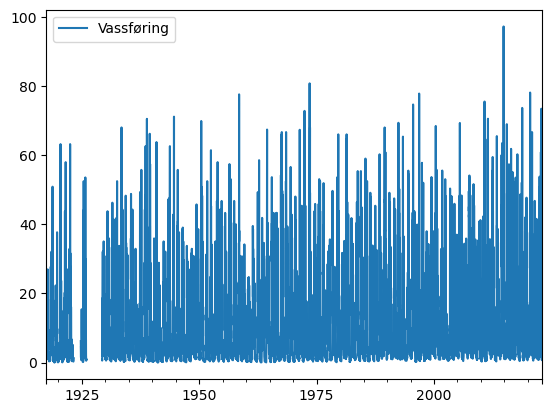

In [18]:
df.plot()

Me ser her at dette ikkje er spesielt nyttig eller informativt. Det me ser her er at det på 1920-talet er eit par år utan målingar. Dette kjem me attende til litt seinare. 

## Middelflom

Middelflommen til ei elv er rekna ut frå den største døgnvassføringa per år over eit lengre tidsrom. Frå [NVE/varsom.no](https://varsom.no/flom-og-jordskred/ordliste/ordliste-for-flom/) finn me denne definisjonen:

> En middelflom (normal flom) defineres som gjennomsnittet av høyeste vannføring hvert år i en lang årrekke.

For å rekna ut dette må me altså først finna den maksimale vassføringa per år. Bruker groupby i Pandas for å finne dette.